In [2]:
%load_ext autoreload
%autoreload 2
from astropy.io import fits
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import utils

from dataset import SunImageDataset

In [ ]:
dl = SunImageDataset(remake=False, correct_sensor_data=True)

In [ ]:
print(np.std(dl.x_data))
print(dl.x_data.shape)

In [3]:
x_arr = np.array(dl.x_data)[:400].reshape(-1)
y_arr = np.array(dl.y_data)[:400].reshape(-1)

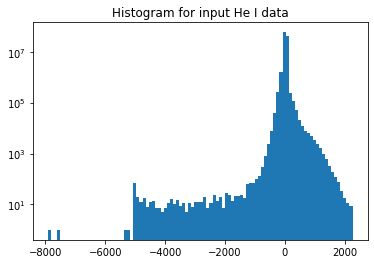

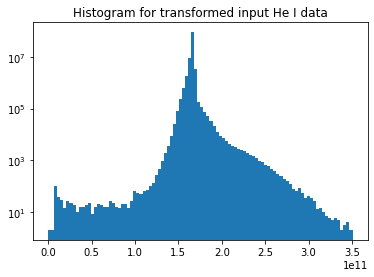

In [10]:
from scipy import stats

transformed_x_arr = stats.boxcox(x_arr - np.min(x_arr)+1, 3)
plt.hist(x_arr, bins=100)
plt.title("Histogram for input He I data")
plt.yscale('log', nonposy='clip')
plt.show()
plt.hist(transformed_x_arr, bins=100)
plt.title("Histogram for transformed input He I data")
plt.yscale('log', nonposy='clip')
plt.show()
#Transform is not really necessary

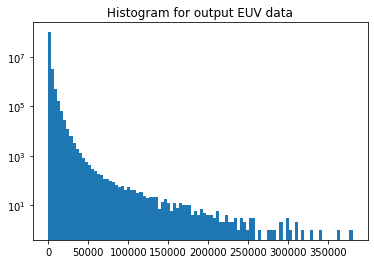

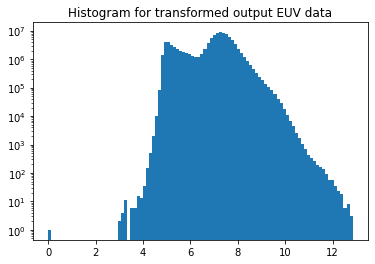

In [4]:
from scipy import stats


transformed_y_arr = stats.boxcox(y_arr - np.min(y_arr) + 1, 0)
plt.hist(y_arr, bins=100)
plt.yscale('log', nonposy='clip')
plt.title("Histogram for output EUV data")
plt.show()
plt.hist(transformed_y_arr, bins=100)
plt.yscale('log', nonposy='clip')
plt.title("Histogram for transformed output EUV data")
plt.show()

In [5]:
dl.y_tensor

tensor([[[[ 1.5827e-01,  2.5519e-01,  2.8793e-01,  ...,  3.6752e-01,
            6.2517e-04,  1.4587e-01],
          [ 2.4909e-01,  2.7725e-01,  5.0345e-01,  ...,  8.9266e-02,
            6.7461e-02,  2.6282e-01],
          [ 2.9392e-01,  4.8026e-01,  4.8288e-01,  ...,  8.5044e-01,
            7.3569e-01,  2.8902e-01],
          ...,
          [ 1.0732e-01,  8.0994e-03,  1.0931e-01,  ...,  1.5755e-01,
            4.4018e-01,  1.2796e-01],
          [ 8.7942e-03,  3.3974e-01,  1.8953e-01,  ...,  5.5965e-01,
            5.9870e-02,  2.9914e-01],
          [ 2.6306e-01, -7.1504e-02,  2.4814e-01,  ...,  2.6856e-01,
           -7.3430e-02,  2.4183e-01]]],


        [[[-1.7612e-01,  3.0371e-01,  3.3200e-02,  ..., -1.2398e-01,
           -2.9235e-02,  1.1590e-01],
          [ 3.2982e-01,  2.4902e-01,  2.4339e-01,  ..., -4.4934e-02,
            1.8100e-01,  1.8006e-01],
          [-2.5773e-02,  5.2105e-01, -5.8334e-02,  ...,  2.1227e-01,
            3.6109e-02, -1.1154e-01],
          ...,
   

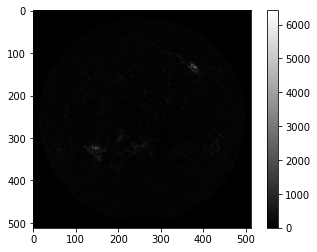

<Figure size 432x288 with 0 Axes>

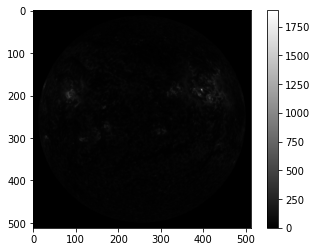

<Figure size 432x288 with 0 Axes>

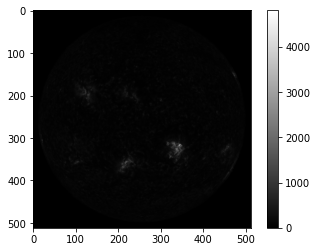

<Figure size 432x288 with 0 Axes>

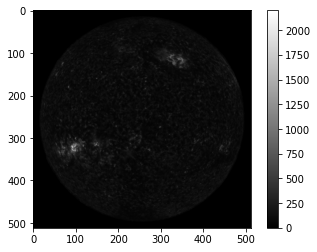

<Figure size 432x288 with 0 Axes>

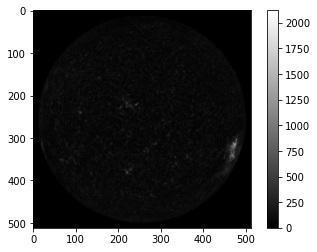

<Figure size 432x288 with 0 Axes>

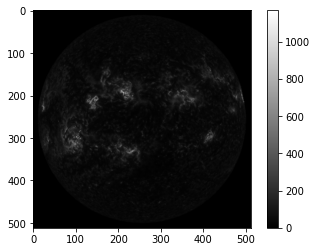

<Figure size 432x288 with 0 Axes>

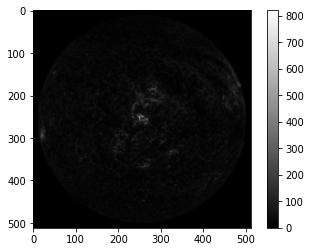

<Figure size 432x288 with 0 Axes>

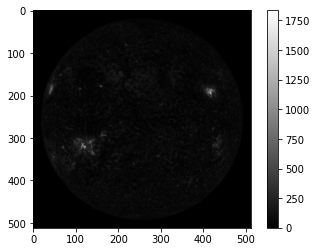

<Figure size 432x288 with 0 Axes>

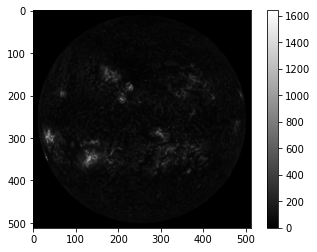

<Figure size 432x288 with 0 Axes>

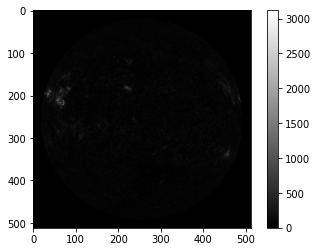

<Figure size 432x288 with 0 Axes>

In [19]:
from skimage.transform import resize

for i in range(10):
    mask = dl.x_data[i, 0, :, :].reshape(512, 512) != 0.0
    data = dl.y_data[i, 0, :, :].reshape(512, 512) * mask
    
    plt.figure()
    plt.imshow(data, cmap='gray')
    plt.colorbar()
    plt.show()
    plt.clf()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


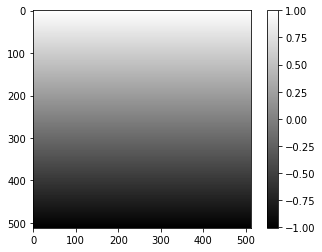

<Figure size 432x288 with 0 Axes>

In [15]:
%load_ext autoreload
%autoreload 2

from transforms import AddLatitudeChannel
import numpy as np

alc = AddLatitudeChannel(['x', 'y'])
test_sample = {'x': np.zeros((1, 512, 512)), 
               'y': np.zeros((1, 512, 512))}
test_sample = alc(test_sample)
plt.figure()
plt.imshow(test_sample['x'][1], cmap='gray')
plt.colorbar()
plt.show()
plt.clf()